The purpose of this ipython notebook is to plot the model RDMs and look at their covariance across tasks and models

In [1]:
import numpy as np
import os, glob
from os.path import join
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

In [2]:
# load numpy
main_dir = '/Users/h/Dropbox/projects_dropbox/social_influence_analysis'
cue = np.load(join(main_dir, 'analysis/fmri/nilearn/rsa/modelrdm/model-cue.npy'))
diagonal = np.load(join(main_dir, 'analysis/fmri/nilearn/rsa/modelrdm/model-diagonal.npy'))
grid = np.load(join(main_dir, 'analysis/fmri/nilearn/rsa/modelrdm/model-grid.npy'))
orthogonal = np.load(join(main_dir, 'analysis/fmri/nilearn/rsa/modelrdm/model-orthogonal.npy'))
parallel = np.load(join(main_dir, 'analysis/fmri/nilearn/rsa/modelrdm/model-parallel.npy'))
rotationgrid = np.load(join(main_dir, 'analysis/fmri/nilearn/rsa/modelrdm/model-rotationgrid.npy'))
stim = np.load(join(main_dir, 'analysis/fmri/nilearn/rsa/modelrdm/model-stim.npy'))
# stack and calculate RDM
models = np.vstack([cue,diagonal,grid,orthogonal,parallel,rotationgrid,stim])

uppeer triangle covariance

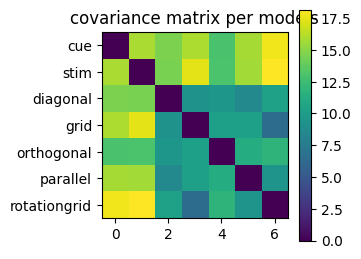

In [23]:
# np.triu(cue)
from mpl_toolkits.axes_grid1 import make_axes_locatable
models_triu = np.vstack([
cue[np.triu_indices_from(cue, k=1)],
stim[np.triu_indices_from(stim, k=1)],
diagonal[np.triu_indices_from(diagonal, k=1)],
grid[np.triu_indices_from(grid, k=1)],
orthogonal[np.triu_indices_from(orthogonal, k=1)],
parallel[np.triu_indices_from(parallel, k=1)],
rotationgrid[np.triu_indices_from(rotationgrid, k=1)]
])

fig, ax3 = plt.subplots(figsize=(3,3))
names = np.array(['cue','stim', 'diagonal', 'grid', 'orthogonal', 'parallel', 'rotationgrid'])

# ax.imshow(models)
tick_positions = np.arange(0, 7) 
ax3.set_yticks(tick_positions) 
ax3.set_yticklabels(names)
# ax3.hlines(np.arange(5.5, 18, 6), xmin = 0, xmax = 17, colors='black', linewidth=1)
# ax3.vlines(np.arange(5.5, 18, 6), ymin = 0, ymax = 17,  colors='black', linewidth=1)
im = ax3.imshow(squareform(pdist(models_triu)))
ax3.set_title("covariance matrix per models")
# ax3.colorbar()
# divider = make_axes_locatable(ax3)
# cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im,  orientation='vertical')



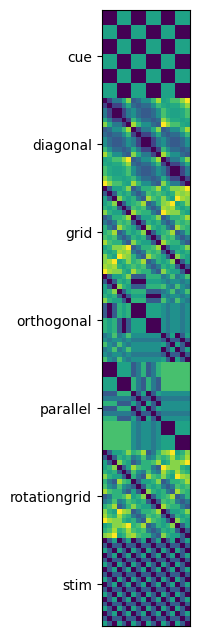

In [8]:
# %% plot models and corresonding names ________________________________________
names = np.array(['cue', 'diagonal', 'grid', 'orthogonal', 'parallel', 'rotationgrid', 'stim'])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(models)
tick_positions = np.arange(0, 126, 18) + 9
ax.set_yticks(tick_positions) 
ax.set_yticklabels(names)
ax.set_xticks([])
ax.set_xticklabels([])
plt.show()
plt.close()

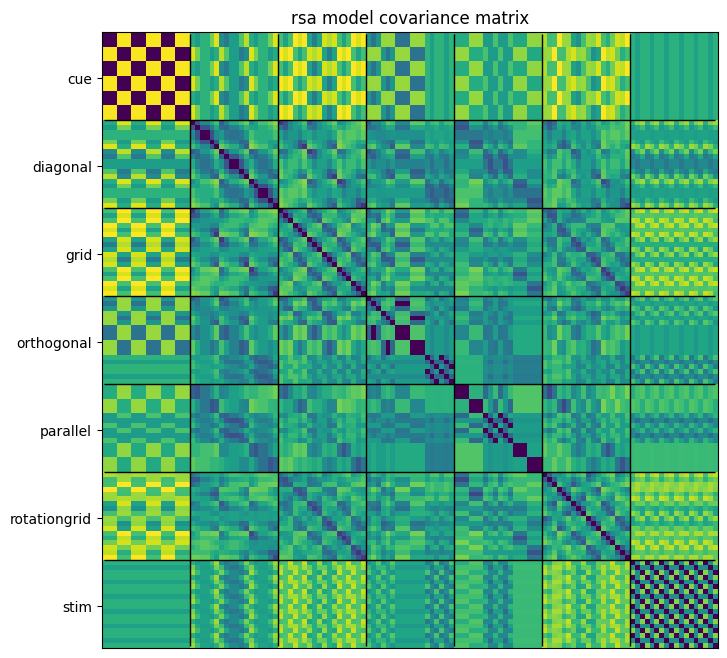

In [21]:
# %% ________________________________________________________________________________
names = np.array(['cue', 'diagonal', 'grid', 'orthogonal', 'parallel', 'rotationgrid', 'stim'])
fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.imshow(squareform(pdist(models)))
tick_positions = np.arange(0, 126, 18) + 9
ax1.set_yticks(tick_positions) 
ax1.set_yticklabels(names)
ax1.set_xticks([])
ax1.set_xticklabels([])
ax1.hlines(np.arange(17.5, 108, 18), xmin = 0, xmax = 125, colors='black', linewidth=1)
ax1.vlines(np.arange(17.5, 108, 18), 0, 125, colors='black', linewidth=1)
ax1.set_title("rsa model covariance matrix")
plt.show()
plt.close()

plot models

Text(0.5, 1.0, 'covariance matrix per task')

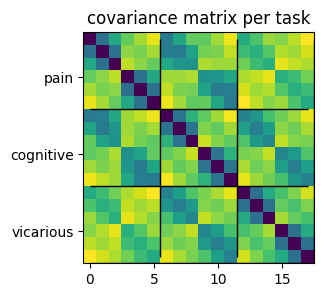

In [22]:
fig, ax2 = plt.subplots(figsize=(3,3))
names = np.array(['pain', 'cognitive', 'vicarious'])

# ax.imshow(models)
tick_positions = np.arange(0, 18, 6) + 3
ax2.set_yticks(tick_positions) 
ax2.set_yticklabels(names)
ax2.hlines(np.arange(5.5, 18, 6), xmin = 0, xmax = 17, colors='black', linewidth=1)
ax2.vlines(np.arange(5.5, 18, 6), ymin = 0, ymax = 17,  colors='black', linewidth=1)
ax2.imshow(squareform(pdist(models.T)))
ax2.set_title("covariance matrix per task")